In [1]:
import numpy as np
import pandas as pd
import os
import re
import warnings
from captum.attr import IntegratedGradients
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from scripts.churn_functions import simple_split, bake, modernize, out_eval

# Need to add get_importances() to all and snapshot_model() to all
## Should return an importance for every feature
And then rerun with correctly selected features

In [2]:
os.chdir('C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators')
data = pd.read_csv("data/out/features.csv")

In [3]:
os.getcwd()


'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [4]:
from models.dev.prediction.scripts.linear import linear_regression
from models.dev.prediction.scripts.tree import decision_tree
from models.dev.prediction.scripts.random import random_forest
from models.dev.prediction.scripts.arima import arima
from models.dev.prediction.scripts.gru import gru
from models.dev.prediction.scripts.lstm import lstm

from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

data = pd.read_csv("data/out/features.csv")

In [5]:
split = 144

l = linear_regression()
l.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

t = decision_tree()
t.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

r = random_forest()
# takes a little bit
r.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

a = arima()
a.fit(data = data, 
      split = split,
      feature_selection = True,order=(12, 1, 0)
     )

In [18]:
g = gru()
g.fit(data =  data, split = split, hidden_size= 64, num_epochs= 100, verbose = 2)
g.predict()

Epoch: 0, train loss: 0.71372, test loss: 0.28315
Epoch: 10, train loss: 0.03184, test loss: 0.01359
Epoch: 20, train loss: 0.02416, test loss: 0.02699
Epoch: 30, train loss: 0.02107, test loss: 0.00918
Epoch: 40, train loss: 0.01796, test loss: 0.00437
Epoch: 50, train loss: 0.01569, test loss: 0.00410
Epoch: 60, train loss: 0.01425, test loss: 0.00425
Epoch: 70, train loss: 0.01338, test loss: 0.00565
Epoch: 80, train loss: 0.01251, test loss: 0.01223
Epoch: 90, train loss: 0.01165, test loss: 0.01741


Train: 2342.007667382721 
Test: 4813.018120769413


(2342.007667382721, 4813.018120769413)

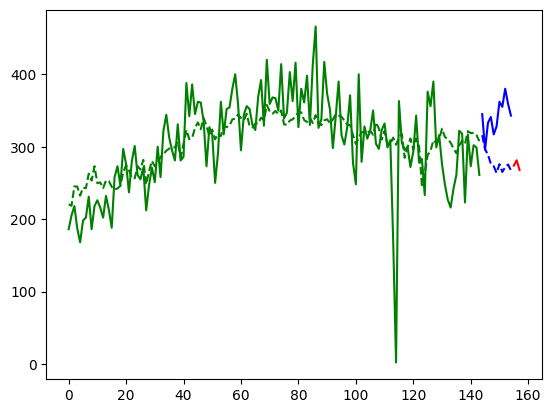

In [19]:
out_eval(g.full, criterion=mean_squared_error, verbose = 2)


In [ ]:
gimp = g.get_importances(20, names = True)
g.fit(data =  data, split = 135, hidden_size= 16, num_epochs= 750, feature_selection=gimp)

In [25]:
m = lstm()
m.fit(data =  data, split = split, hidden_size= 16, num_epochs= 150, verbose = 2)
m.predict()

Epoch: 0, train loss: 1.01341, test loss: 0.91057
Epoch: 15, train loss: 0.05531, test loss: 0.01254
Epoch: 30, train loss: 0.02207, test loss: 0.00361
Epoch: 45, train loss: 0.02064, test loss: 0.00762
Epoch: 60, train loss: 0.01839, test loss: 0.00485
Epoch: 75, train loss: 0.01772, test loss: 0.00259
Epoch: 90, train loss: 0.01713, test loss: 0.00213
Epoch: 105, train loss: 0.01648, test loss: 0.00194
Epoch: 120, train loss: 0.01589, test loss: 0.00184
Epoch: 135, train loss: 0.01533, test loss: 0.00182


Train: 3163.4819213990527 
Test: 395.54262160482926


(3163.4819213990527, 395.54262160482926)

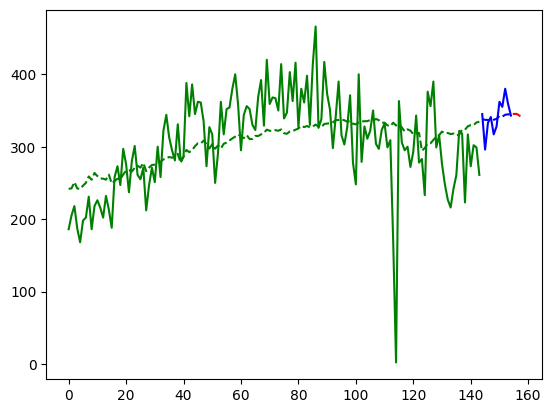

In [29]:
out_eval(m.full, criterion=mean_squared_error, verbose = 2)

In [20]:
l.predict()
t.predict()
r.predict()
a.predict()
g.predict()
m.predict()

NameError: name 'm' is not defined

In [57]:
l.full.to_csv("models/dev/prediction/snapshots/l-9-13-23.csv")
l.get_importances().to_csv("models/dev/prediction/snapshots/l-imp-9-13-23.csv")

In [58]:
t.full.to_csv('models/dev/prediction/snapshots/t-9-13-23.csv')
t.get_importances().to_csv("models/dev/prediction/snapshots/t-imp-9-13-23.csv")

In [59]:
r.full.to_csv('models/dev/prediction/snapshots/r-9-13-23.csv')
r.get_importances().to_csv("models/dev/prediction/snapshots/r-imp-9-13-23.csv")

In [60]:
a.full.to_csv('models/dev/prediction/snapshots/a-9-13-23.csv')

In [61]:
g.full.to_csv('models/dev/prediction/snapshots/g-9-13-23.csv')
g.get_importances().to_csv("models/dev/prediction/snapshots/g-imp-9-13-23.csv")

In [62]:
m.full.to_csv('models/dev/prediction/snapshots/m-9-13-23.csv')
m.get_importances().to_csv("models/dev/prediction/snapshots/m-imp-9-13-23.csv")

In [56]:
l.get_importances()

,imp,name
24,22.021289,GT_lag9
53,13.392438,session_dur_lag6
30,5.808407,industry_lag9
3,3.983167,AN_lag3
40,2.881919,month
...,...,...
13,-1.136057,F_v_lag12
34,-1.177761,laborpart_lag9
4,-1.807067,AN_v_lag12
61,-2.574046,treasurymat5_lag9


Epoch: 0, train loss: 0.21099, test loss: 0.00806
Epoch: 50, train loss: 0.01055, test loss: 0.02793
Epoch: 100, train loss: 0.00785, test loss: 0.03919
Epoch: 150, train loss: 0.00696, test loss: 0.03735
Epoch: 200, train loss: 0.00635, test loss: 0.03607
Epoch: 250, train loss: 0.00581, test loss: 0.03323
Epoch: 300, train loss: 0.00526, test loss: 0.03162
Epoch: 350, train loss: 0.00468, test loss: 0.03103
Epoch: 400, train loss: 0.00404, test loss: 0.02623
Epoch: 450, train loss: 0.00340, test loss: 0.01958
Epoch: 0, train loss: 0.40879, test loss: 0.24595
Epoch: 75, train loss: 0.01080, test loss: 0.05478
Epoch: 150, train loss: 0.00903, test loss: 0.04991
Epoch: 225, train loss: 0.00821, test loss: 0.04588
Epoch: 300, train loss: 0.00746, test loss: 0.03532
Epoch: 375, train loss: 0.00660, test loss: 0.02254
Epoch: 450, train loss: 0.00593, test loss: 0.01606
Epoch: 525, train loss: 0.00534, test loss: 0.01345
Epoch: 600, train loss: 0.00462, test loss: 0.01045
Epoch: 675, train 

(744.3333213542843, 1687.2655931799638)

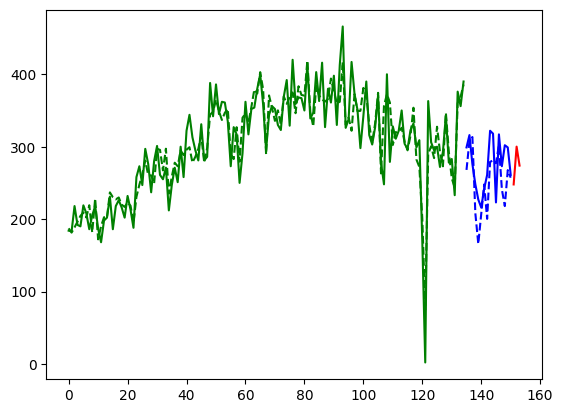

In [6]:
# fits twice for feature_selection

g.predict()
out_eval(g.full, criterion=mean_squared_error, verbose = 2)

In [24]:

m.predict()
# no feature selection

Epoch: 0, train loss: 0.50352, test loss: 0.22674
Epoch: 30, train loss: 0.01473, test loss: 0.02095
Epoch: 60, train loss: 0.01174, test loss: 0.03743
Epoch: 90, train loss: 0.00927, test loss: 0.03867
Epoch: 120, train loss: 0.00807, test loss: 0.04019
Epoch: 150, train loss: 0.00741, test loss: 0.03914
Epoch: 180, train loss: 0.00682, test loss: 0.03899
Epoch: 210, train loss: 0.00626, test loss: 0.03488
Epoch: 240, train loss: 0.00566, test loss: 0.02684
Epoch: 270, train loss: 0.00495, test loss: 0.01633


In [25]:
l.predict()
t.predict()
r.predict()
a.predict()
g.predict()
m.predict()

Train: 898.7359033934392 
Test: 2070.7421758801192


(898.7359033934392, 2070.7421758801192)

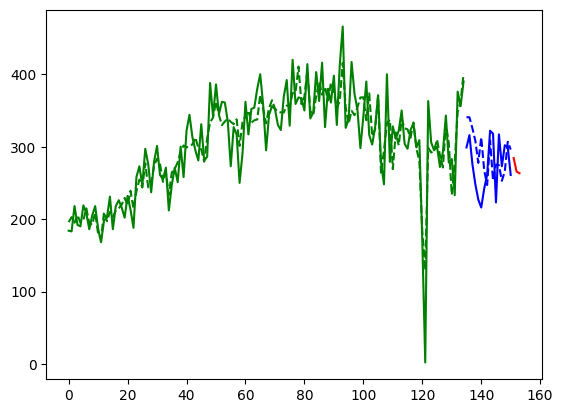

In [26]:
out_eval(m.full, criterion=mean_squared_error, verbose=2)

In [46]:
from scripts.churn_functions import out_eval
from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

For a model class, it needs to have 
    - fit method, which will take in most arguments and update model attribute
    - bake method, which will predict and return
    
    - need data attributes, cv attributes, features_in, targetvar, split, features_out, model itself, and out

In [8]:
r = random_forest()

r.fit(data = data, 
              split = 135,
              scoring = "neg_mean_squared_error",
              feature_selection = True)
r.predict()

In [23]:
r.get_importances().merge(r.__X_train__.columns.to_frame(), how = 'left', left_index=False, right_index=True, left_on = 'name')

,imp,name,0
8,0.321707,GT_lag3,GT_lag3
15,0.242295,prodmanuf_lag3,prodmanuf_lag3
7,0.101134,GT_lag9,GT_lag9
2,0.072823,g_car_for_sale_near_me_lag3,g_car_for_sale_near_me_lag3
13,0.061061,MZDAY_v_lag3,MZDAY_v_lag3
17,0.029958,treasurymat1_lag6,treasurymat1_lag6
1,0.020137,BWA_v_lag6,BWA_v_lag6
4,0.019596,g_how_to_buy_a_car_lag3,g_how_to_buy_a_car_lag3
14,0.019262,ngspot_lag3,ngspot_lag3
6,0.017556,g_used_cars_lag9,g_used_cars_lag9


In [15]:
r.__X_train__.columns.to_frame()

,0
BWA_lag9,BWA_lag9
BWA_v_lag6,BWA_v_lag6
g_car_for_sale_near_me_lag3,g_car_for_sale_near_me_lag3
g_how_to_buy_a_car_lag9,g_how_to_buy_a_car_lag9
g_how_to_buy_a_car_lag3,g_how_to_buy_a_car_lag3
g_new_cars_lag9,g_new_cars_lag9
g_used_cars_lag9,g_used_cars_lag9
GT_lag9,GT_lag9
GT_lag3,GT_lag3
GT_v_lag12,GT_v_lag12


In [232]:
l = lstm()

l.fit(data = data, split = 135, verbose = 2, num_epochs= 300, hidden_size=16, learning_rate=0.01, feature_selection = None)

Epoch: 0, train loss: 0.86014, test loss: 0.38445
Epoch: 30, train loss: 0.02646, test loss: 0.03057
Epoch: 60, train loss: 0.01553, test loss: 0.01758
Epoch: 90, train loss: 0.01180, test loss: 0.02735
Epoch: 120, train loss: 0.01126, test loss: 0.02581
Epoch: 150, train loss: 0.00970, test loss: 0.02379
Epoch: 180, train loss: 0.00810, test loss: 0.02214
Epoch: 210, train loss: 0.00693, test loss: 0.01945
Epoch: 240, train loss: 0.00482, test loss: 0.01367
Epoch: 270, train loss: 0.00390, test loss: 0.01017


In [233]:
l.predict()

Train: 712.1666583405694 
Test: 1897.5579971795792


(712.1666583405694, 1897.5579971795792)

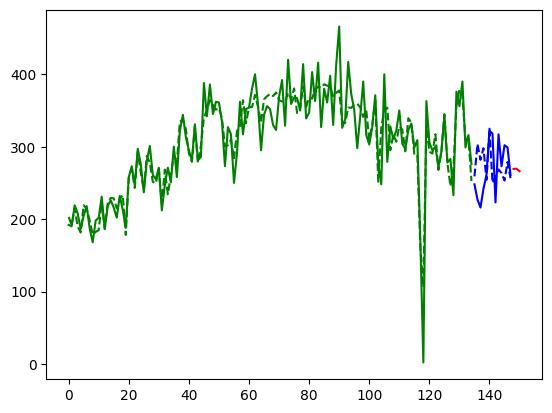

In [239]:
out_eval(l.full, criterion=mean_squared_error, verbose=2)

In [237]:
fs = l.get_importances(names = True)
fs

array(['stuffcpi_lag9', 'g_car_for_sale_near_me_lag3',
       'g_dealership_near_me_lag3', 'retail_lag3',
       'g_how_to_buy_a_car_lag3', 'carcpi_lag6', 'industry_lag9',
       'ngspot_lag3', 'stuffcpi_lag3', '10yinf_lag3', 'LEA_lag6',
       'g_how_to_buy_a_car_lag9', 'month', 'g_best_new_cars_lag12',
       'g_best_new_cars_lag9'], dtype=object)

In [215]:
l.predict()

Train: 0.04780576306322345 
Test: 3269.030577278458


(0.04780576306322345, 3269.030577278458)

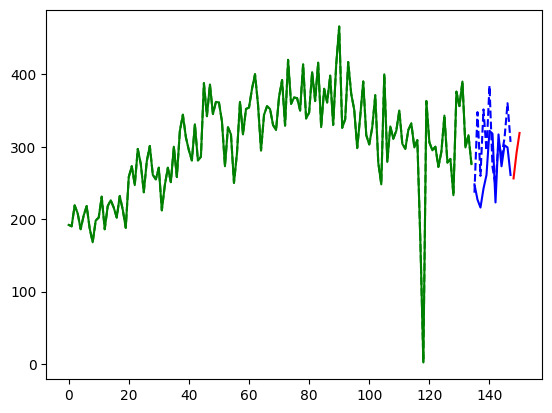

In [216]:
out_eval(l.full, criterion=mean_squared_error, verbose=2)

In [23]:
g.get_importances(10)

,imp,name
0,0.271761,stuffcpi_lag3
1,0.120152,ngspot_lag3
5,0.118044,AN_lag12
2,0.112457,sales_lag3
7,0.081934,localrent_lag9
9,0.060473,industrycg_lag9
8,0.053311,hcpiurban_lag9
6,0.034909,carcpi_lag9
3,0.010530,hcpiurban_lag12
4,0.005757,g_dealership_near_me_lag3


In [19]:
def expand_grid(splits, eval_scoring):
        aG, bG = np.meshgrid(list(splits), list(eval_scoring)) # create the actual grid
        aG = aG.flatten() # make the grid 1d
        bG = bG.flatten()
        return pd.DataFrame({
            'splits':aG, 
            'eval_scoring':bG})

expand_grid(splits = [(117, 119), (125, 130), (130, 135)], eval_scoring= [mean_squared_error, r2_score])

,splits,eval_scoring
0,117,<function mean_squared_error at 0x000002ADC461...
1,119,<function mean_squared_error at 0x000002ADC461...
2,125,<function mean_squared_error at 0x000002ADC461...
3,130,<function mean_squared_error at 0x000002ADC461...
4,130,<function mean_squared_error at 0x000002ADC461...
5,135,<function mean_squared_error at 0x000002ADC461...
6,117,<function r2_score at 0x000002ADC46196C0>
7,119,<function r2_score at 0x000002ADC46196C0>
8,125,<function r2_score at 0x000002ADC46196C0>
9,130,<function r2_score at 0x000002ADC46196C0>


In [20]:
def train_all(split, criterion):
    from models.dev.prediction.scripts.linear import linear_regression
    from models.dev.prediction.scripts.tree import decision_tree
    from models.dev.prediction.scripts.random import random_forest

    data = pd.read_csv("data/out/features.csv")
    
    # save results to df
    df = pd.DataFrame(columns = ['split',
                         'scoring_method', 
                         'train_score', 
                         'eval_score'])
    
    l = linear_regression()
    t = decision_tree()
    r = random_forest()
    
    l.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    t.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    # takes a little bit
    r.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    l.predict()
    t.predict()
    r.predict()

    # compose df
    df.loc['lm'] = [split, criterion.__name__, out_eval(l.full, criterion)[0], out_eval(l.full, criterion)[1]]

    df.loc['tree'] = [split, criterion.__name__, out_eval(t.full, criterion)[0], out_eval(t.full, criterion)[1]]
    
    df.loc['rf'] = [split, criterion.__name__, out_eval(r.full, criterion)[0], out_eval(r.full, criterion)[1]]

    return df

In [33]:
train_all(split = 117, criterion=mean_squared_error)

,split,scoring_method,train_score,eval_score
lm,117,mean_squared_error,910.776837,6468.894566
tree,117,mean_squared_error,982.942894,6286.495117
rf,117,mean_squared_error,182.112869,5392.636877


In [21]:
full = pd.DataFrame(columns = ['model',
                               'split', 
                                'scoring_method',
                                      'train_score',
                                     'eval_score'])
for i in range(20, 135, 5):
    
    pdf = train_all(split = (i, 135),
                   criterion = mean_squared_error)
    
    pdf.reset_index(inplace=True)
    
    pdf = pdf.rename(columns = {'index':'model'})
    
    full = pd.concat([pdf, full], ignore_index = True)

C:\Users\keato\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+00, tolerance: 1.955e+00
  model = cd_fast.enet_coordinate_descent(


In [24]:
full # model and criterion cols empty
#try again?
# takes like an hour
full.to_csv("fully.csv")

In [33]:
data.corr().sort_values('n', ascending= False)

,n,10yinf_lag9,BWA_lag3,caput_lag9,cbpy30_lag6,discount_lag3,fedfundseff_lag3,fedsurplus_lag6,g_best_new_cars_lag9,g_cars_for_sale_lag9,...,retail_lag9,sahmrule_lag9,treasurymat1_lag6,treasurymat10_lag6,treasurymat5_lag6,treasurymat7_lag6,unemp15to26w_lag9,unemp27ov_lag3,XOM_lag3,year
n,1.000000,-0.213306,-0.292134,0.403702,-0.148330,0.216254,0.225922,0.120776,0.014408,-0.032022,...,0.226788,-0.070904,0.219000,-0.033699,0.176350,0.092140,-0.193721,-0.527003,0.249201,0.278859
industry_lag9,0.496184,0.071375,-0.350680,0.906502,-0.182998,0.480380,0.487391,0.096793,0.012848,0.059622,...,0.468638,-0.439155,0.505942,0.120765,0.432532,0.303956,-0.471779,-0.772611,0.295032,0.468376
pempltot_lag9,0.460762,-0.213985,-0.721437,0.728054,-0.505770,0.667605,0.662510,-0.105258,-0.058041,0.241440,...,0.756135,-0.074481,0.694007,-0.077636,0.441273,0.217967,-0.564920,-0.947661,-0.064148,0.872736
pemplmanuf_lag6,0.425111,-0.025884,-0.585530,0.811438,-0.312324,0.694202,0.696913,0.107977,-0.014413,0.142220,...,0.616025,-0.280483,0.729672,0.089703,0.540921,0.346822,-0.619096,-0.907502,0.160982,0.693389
caput_lag9,0.403702,0.226221,-0.363982,1.000000,-0.181894,0.591572,0.583723,0.022493,0.073281,0.121579,...,0.619659,-0.478507,0.594003,0.148375,0.489382,0.345703,-0.503043,-0.769667,0.358417,0.559449
LEA_lag3,0.357798,-0.259112,-0.605078,0.393243,-0.555845,0.401013,0.387293,-0.098387,-0.076502,0.444626,...,0.641463,0.256393,0.385445,-0.137251,0.256333,0.098080,-0.265245,-0.687119,-0.211360,0.764428
kwhcost_lag3,0.342589,-0.130195,-0.700052,0.555292,-0.584987,0.615406,0.596771,-0.213521,-0.061719,0.454389,...,0.899709,0.185834,0.607572,-0.164392,0.329170,0.114916,-0.403551,-0.790537,-0.177716,0.957584
industrycg_lag9,0.291098,0.230188,-0.311574,0.807225,0.050006,0.474217,0.465724,0.040851,0.159815,0.221080,...,0.499700,-0.386040,0.463878,0.282753,0.483994,0.416494,-0.226075,-0.505771,0.375777,0.365175
year,0.278859,-0.088406,-0.687502,0.559449,-0.655354,0.580280,0.555650,-0.232156,-0.050858,0.510887,...,0.934990,0.223467,0.563960,-0.232246,0.270163,0.048913,-0.379753,-0.779478,-0.208479,1.000000
overmanuf_lag3,0.270049,-0.027392,0.219927,0.025462,0.049596,-0.210548,-0.195416,0.294732,-0.075670,-0.210657,...,-0.346969,-0.121575,-0.251910,0.060712,-0.062391,-0.001990,0.046747,0.002626,0.280054,-0.281392
